## <center> MADRID DATASET AIRBNB <center>

La ciudad de Madrid se encuentra en la zona central de la península ibérica. Es la más poblada de España, y la segunda ciudad más poblada de la Unión Europea. 
En cuanto al turismo, también es la ciudad de España más visitada.


Fuente:Wikipedia

Objetivo: Averiguar cúal es la oferta y las condiciones de alquiler por Airbnb en Madrid

## 1. Carga y Preprocesamiento

Librerias


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
#para sacar los warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

Carga del dataset

In [4]:
df= pd.read_csv("airbnb_anuncios.csv")
df.head(4)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301


Análisis de las columnas

In [5]:
df.shape

(20837, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

Comprobación duplicados

In [7]:
df.duplicated().sum()

0

Comprobación vacíos

In [8]:
df.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Eliminación de columnas innecesarias

In [9]:
df.drop(["name","id","last_review"], axis= 1, inplace=True)

Relleno de vacíos

In [10]:
df["reviews_per_month"].fillna(0, inplace=True)

In [11]:
df["host_name"].fillna("Sin nombre", inplace=True)

In [12]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## 2. Análisis variables dataset

Test de normalidad y correlaciones

Test Normalidad Shapiro

In [13]:
from scipy.stats import shapiro

Ho= las variables siguen una distribución normal

In [14]:
test_norm = shapiro(df["price"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.0


c:\Users\fara1\.vscode\Fara Mazza\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Las variables testeadas no siguen una distribución normal**

C:\Users\fara1\AppData\Local\Temp\ipykernel_5956\1603039620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])


<AxesSubplot: xlabel='availability_365', ylabel='Density'>

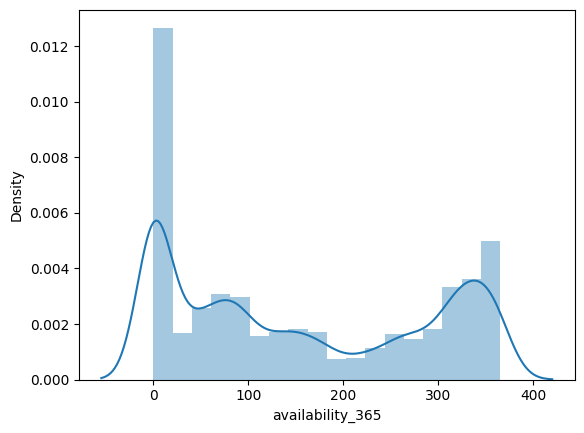

In [15]:
sns.distplot(df["availability_365"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_5956\866192648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["minimum_nights"]*10000, kde=True)


<AxesSubplot: xlabel='minimum_nights', ylabel='Density'>

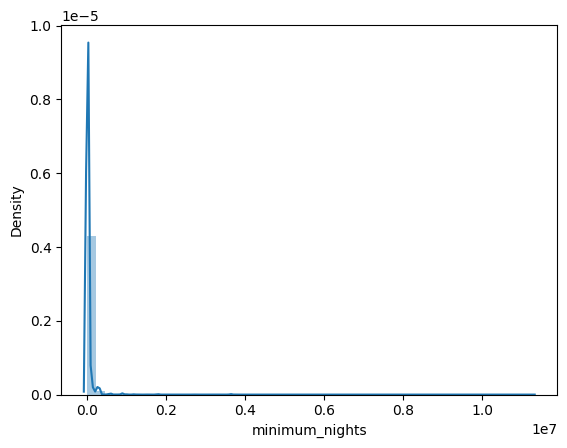

In [16]:
sns.distplot(df["minimum_nights"]*10000, kde=True)

Correlaciones

In [17]:
import matplotlib.pyplot as plt

In [18]:
sns.set(font_scale=0.6) #mismo escalado end del grafico

<AxesSubplot: >

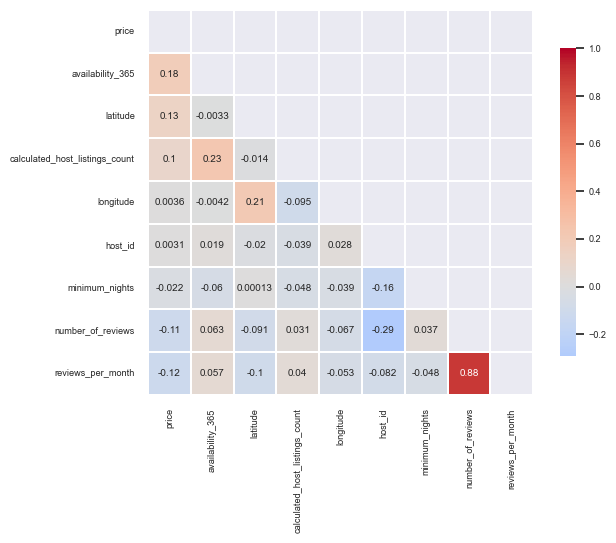

In [19]:
corr = df.corr(method = 'spearman').sort_values(by = 'price', axis = 0, ascending = False).sort_values(by = 'price', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7,5))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:,0:], mask=mask[0:,0:], cmap="coolwarm", vmax=1, center=0,
            square=True, linewidths=.10, cbar_kws={"shrink": .8}, annot = True)

Test de correlacion Spearman

In [20]:
from scipy.stats import spearmanr

Ho= las variables son independientes

In [21]:
stat, p = spearmanr(df["price"], df["latitude"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.133, p=0.000
Probablemente dependientes


In [22]:
stat, p = spearmanr(df["price"], df["availability_365"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.184, p=0.000
Probablemente dependientes


Test estacionario Prueba de Dickey-Fuller aumentada (ADF)

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
stat, p, lags, obs, crit, t = adfuller(df["price"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente no estacionaria')
else:
	print('Probablemente estacionaria')

stat=-11.586, p=0.000
Probablemente estacionaria


Comprobación outliers

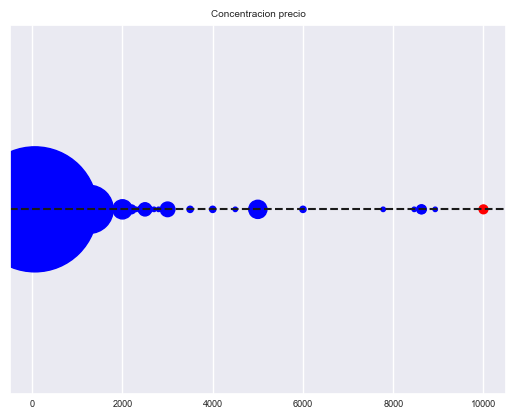

In [26]:
precios = df["price"]
precios_unique, counts = np.unique(precios, return_counts=True)
 
sizes = counts*10
colors = ['blue']*len(precios_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(precios_unique, np.ones(len(precios_unique)), s=sizes, color=colors)
plt.yticks([])
plt.tick_params(direction ="in")
plt.title("Concentracion precio")
plt.show()

In [27]:
df.head(2)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,0.56,1,53
1,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.55,2,48


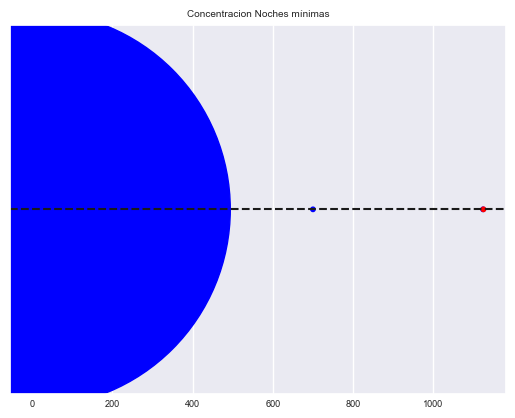

In [28]:
nights = df["minimum_nights"]
nights_unique, counts = np.unique(nights, return_counts=True)
 
sizes = counts*10
colors = ['blue']*len(nights_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(nights_unique, np.ones(len(nights_unique)), s=sizes, color=colors)
plt.yticks([])
plt.tick_params(direction ="in")
plt.title("Concentracion Noches mínimas")
plt.show()

In [29]:
# # Get rid of outliers. Fuente Kaggle

# cols = ["price", "minimum_nights", "calculated_host_listings_count",
#         "reviews_per_month", "number_of_reviews"]

# for col in cols:
#     upper_bound = df[col].quantile(0.95)
#     lower_bound = df[col].quantile(0.05)
#     df = df[df[col] < upper_bound]
#     df = df[df[col] > lower_bound]

## Análisis de la oferta de viviendas

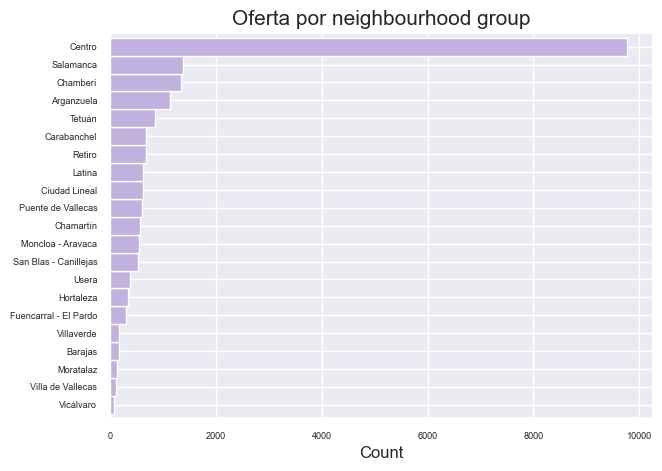

In [30]:
neighbors =df["neighbourhood_group"].value_counts().sort_values(ascending=True)
neighbors.plot.barh(figsize=(7, 5), color = ("#c1b1de"), width=1)
plt.title("Oferta por neighbourhood group", fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.show()

In [31]:
# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

In [32]:
lats2018 = df['latitude'].tolist()
lons2018 = df['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[40.4165, -3.70256], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

zoom en el centro

In [33]:
dfc = df[df["neighbourhood_group"] == "Centro"]

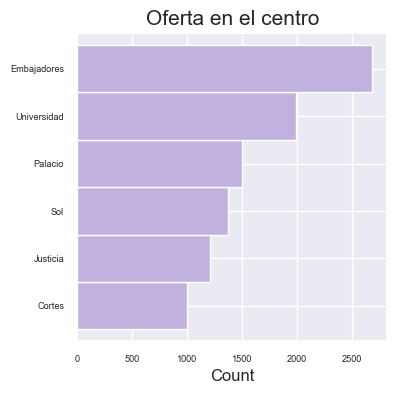

In [34]:
neighc=dfc['neighbourhood'].value_counts().sort_values(ascending=True)
neighc.plot.barh(figsize=(4, 4), color="#c1b1de", width=1) #bar o barh es la orientacion. horizontal o vertical
plt.title("Oferta en el centro", fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.show()

Oferta por room_type

Text(0.5, 1.0, 'Tipos de habitaciones mas ofertadas')

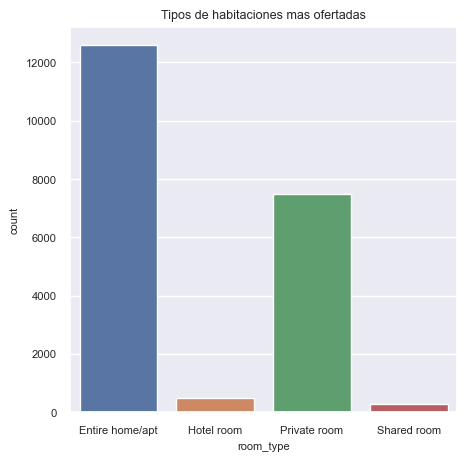

In [35]:
plt.figure(figsize =(5, 5))
plt.xlabel("room_type",fontsize=8)
plt.ylabel("count", fontsize=8)
#to increase y ticks size
plt.yticks(size=8)
#to increase x ticks 
plt.xticks(size=8)
ax = sns.countplot(x="room_type",data=df.sort_values("room_type",ascending=True)) 
ax.set_title("Tipos de habitaciones mas ofertadas", fontsize=9)

Oferta por tipo de room

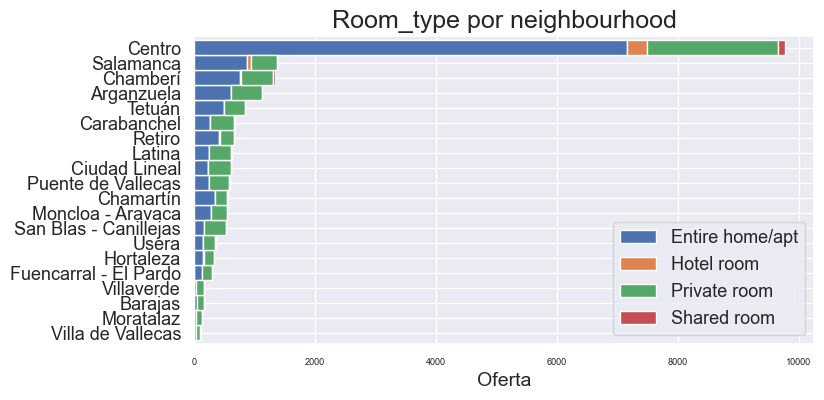

In [52]:
roomtotal = df.groupby(['neighbourhood_group','room_type']).neighbourhood_group.count().sort_values(ascending=False)
roomtotal = roomtotal.unstack()
roomtotal['total'] = roomtotal.iloc[:,:].sum(axis = 1)
roomtotal = roomtotal.sort_values(by=['total'])
roomtotal = roomtotal[roomtotal['total']>=100]
roomtotal = roomtotal.drop(columns=['total'])

roomtotal.plot(kind='barh',stacked=True, 
              linewidth = 1, grid=True, figsize=(8,4), width=1)
plt.title('Room_type por neighbourhood', fontsize=18)
plt.xlabel('Oferta', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

## Análisis de los precios

Precios por neighbourhood group

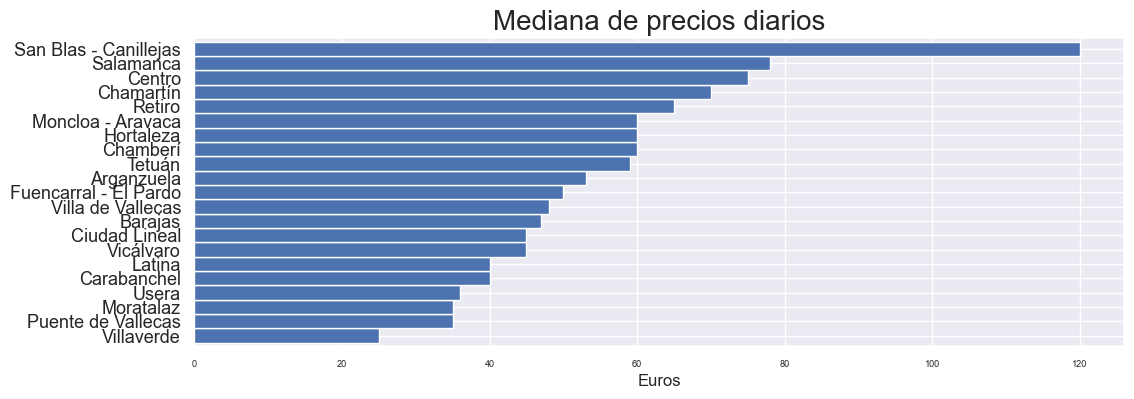

In [37]:
#uso mediana por presencia de outliers
df1 = df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=True)
df1.plot.barh(figsize=(12, 4), color='b', width=1)
plt.title("Mediana de precios diarios", fontsize=20)
plt.xlabel('Euros', fontsize=12)
plt.ylabel("")
plt.show()

Precio por rango de precios

In [38]:
#price por dispo
# Divide price into 6 bins
df["price"] = pd.qcut(df["price"], 6)
 

Rango de precios por neighbourhood group

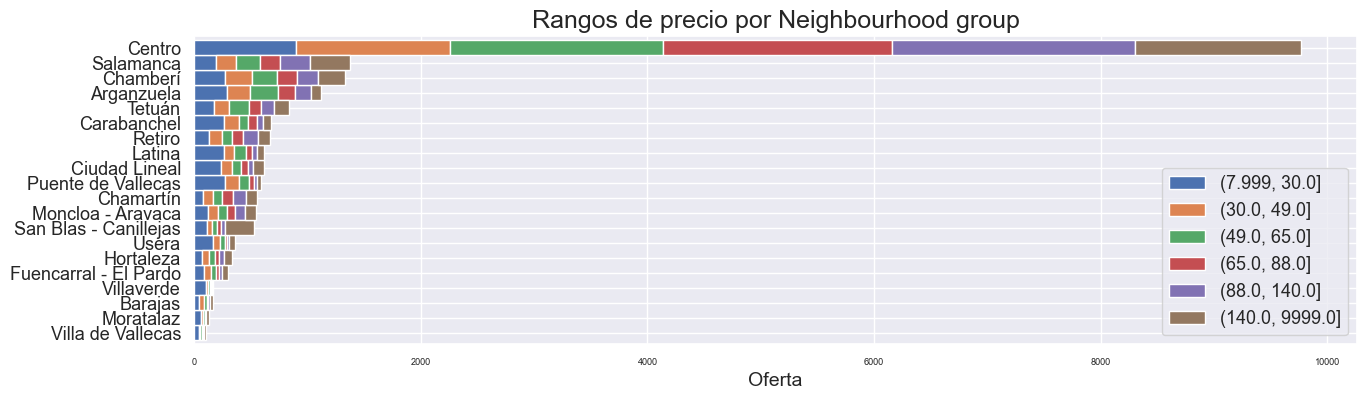

In [53]:
neiprice = df.groupby(['neighbourhood_group','price']).neighbourhood_group.count().sort_values(ascending=False)
neiprice = neiprice.unstack()
neiprice['total'] = neiprice.iloc[:,:].sum(axis = 1)
neiprice = neiprice.sort_values(by=['total'])
neiprice = neiprice[neiprice['total']>=100]
neiprice = neiprice.drop(columns=['total'])

neiprice.plot(kind='barh',stacked=True, 
              linewidth = 1, grid=True, figsize=(15,4), width=1)
plt.title('Rangos de precio por Neighbourhood group', fontsize=18)
plt.xlabel('Oferta', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Rango de precios por room type

In [55]:
import plotly.express as px

In [56]:
px.scatter(df, x="minimum_nights", y="price", log_x=True,color="room_type", template="plotly")

## Analisis de la disponibilidad

Disponibilidad anual por rango de precios

<AxesSubplot: xlabel='availability_365', ylabel='price'>

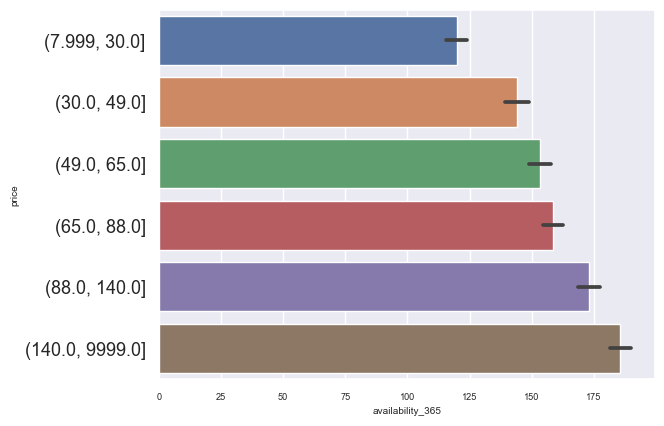

In [42]:
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ="availability_365", y ="price", data = df)

Disponibilidad anual por neighbourhood group

<AxesSubplot: xlabel='availability_365', ylabel='neighbourhood_group'>

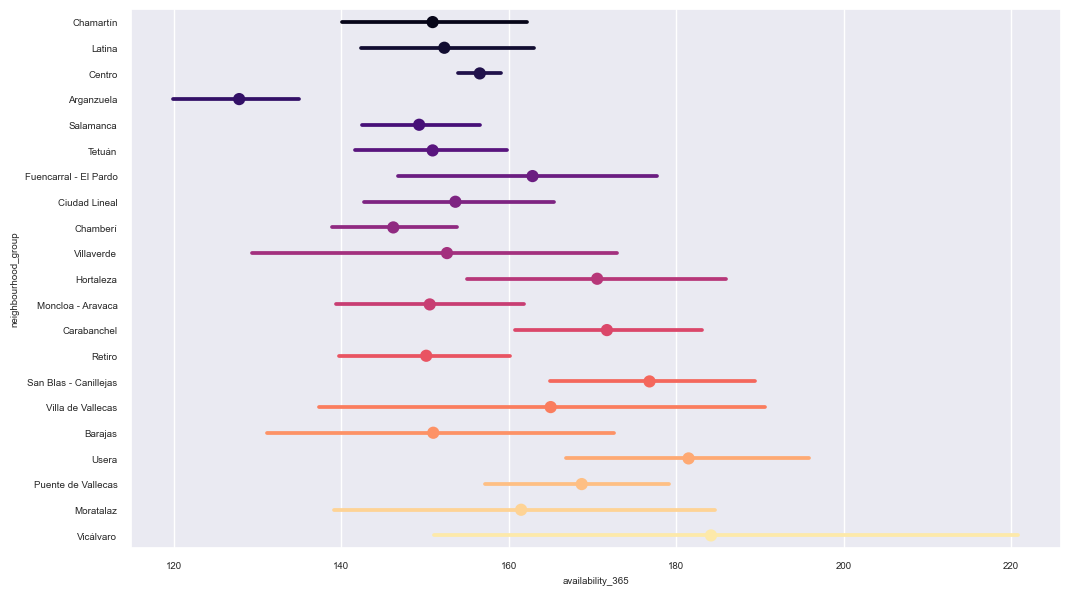

In [43]:
plt.figure(figsize =(12, 7))
plt.xlabel("neighbourhood_group",fontsize=7)
plt.ylabel("availability_365", fontsize=7)
plt.yticks(size=7)
plt.xticks(size=7)
sns.pointplot(df, x="availability_365", y="neighbourhood_group", palette="magma")

## Análisis de anfitriones y estadías

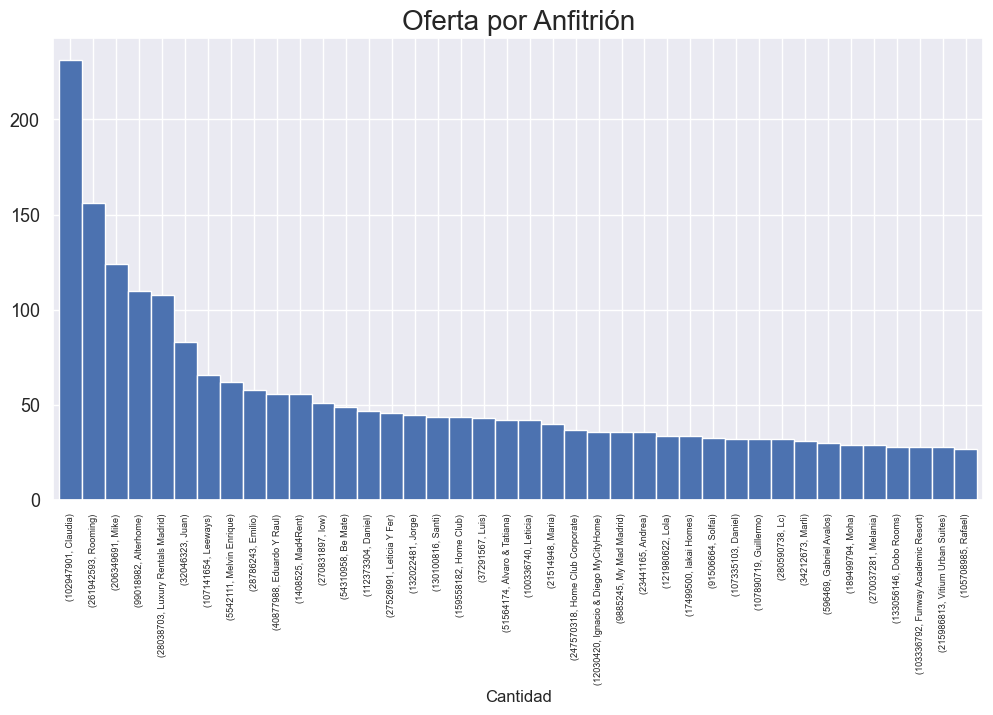

In [44]:
canthost = df.groupby(["host_id", "host_name"]).host_name.count().sort_values(ascending=False).head(40)
canthost.plot.bar(figsize=(12, 6), color='b', width=1)
plt.title("Oferta por Anfitrión", fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel("")
plt.show()

In [49]:
px.scatter(df, x="minimum_nights", y="availability_365", size_max=40,template="plotly")

In [57]:
px.scatter(df, x="minimum_nights", y="availability_365", log_x=True,color="availability_365", template="plotly")